# Gold Price Prediction 

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\MAHARSH SHAH\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('gold.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


# Data Interpretation

## SPX - 
The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States.
## GLD -
SPDR Gold Shares is part of the SPDR family of exchange-traded funds (ETF) managed and marketed by State Street Global Advisors.
## USO -
The United States Oil Fund ® LP (USO) is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca.
## SLV -
The iShares Silver Trust (SLV) is an exchange traded fund (ETF) that tracks the price performance of the underlying holdings in the LMBA Silver Price.
## EUR/USD -
The Currency Pair EUR/USD is the shortened term for the euro against U.S. dollar pair, or cross for the currencies of the European Union (EU) and the United States (USD). The value of the EUR/USD pair is quoted as 1 euro per x U.S. dollars. For example, if the pair is trading at 1.50, it means it takes 1.5 U.S. dollars to buy 1 euro.

# Basic Checks 

In [3]:
df.shape

(2290, 6)

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [7]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
num_data=df.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)


numerical colums Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


In [11]:
cat_data=df.select_dtypes(include=["O"])
print("categorical colums",cat_data.columns)

categorical colums Index(['Date'], dtype='object')


In [12]:
df.rename(columns={'EUR/USD':'EU'}, inplace=True)

In [13]:
df

,Date,SPX,GLD,USO,SLV,EU
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


# EDA

In [14]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariant Analysis 

<Axes: xlabel='SPX', ylabel='Count'>

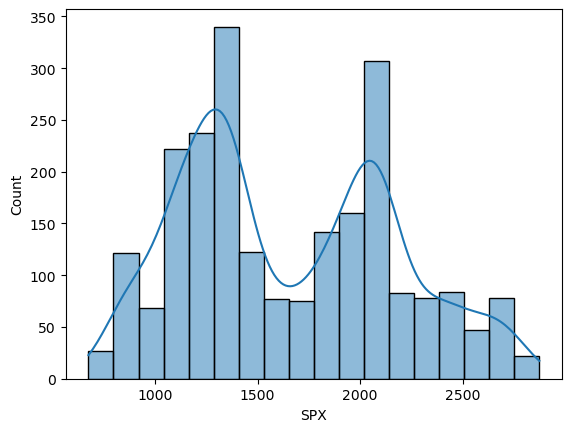

In [15]:
sns.histplot(x=df.SPX,kde=True)

<Axes: xlabel='SPX'>

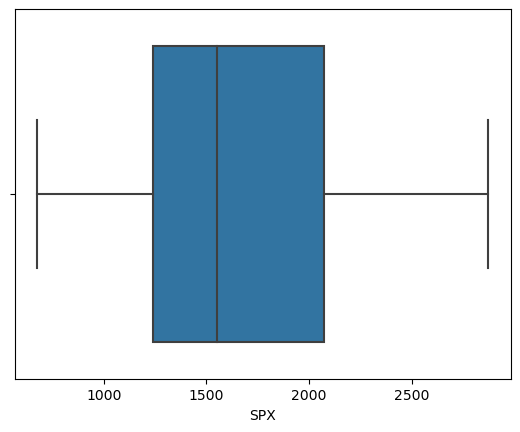

In [16]:
sns.boxplot(x=df.SPX)

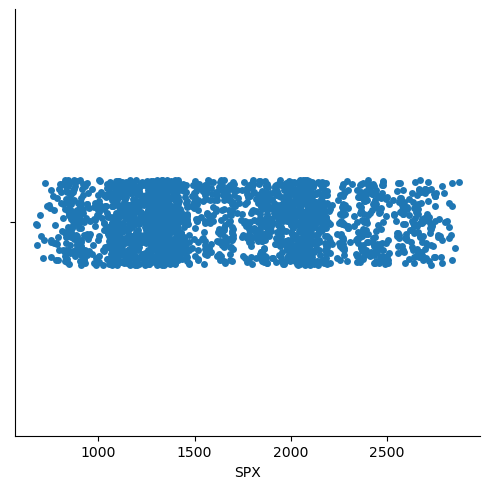

In [17]:
sns.catplot(x=df.SPX)

<Axes: xlabel='SPX'>

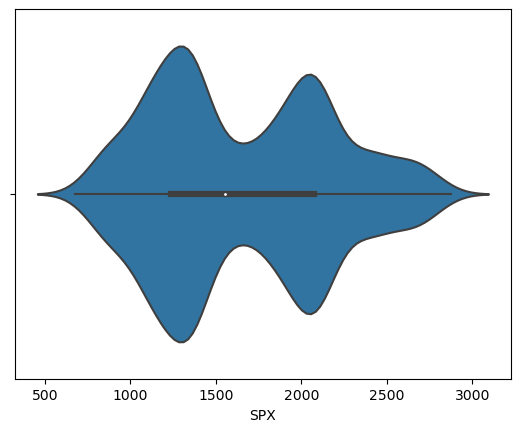

In [18]:
sns.violinplot(x=df.SPX)

<Axes: xlabel='SPX'>

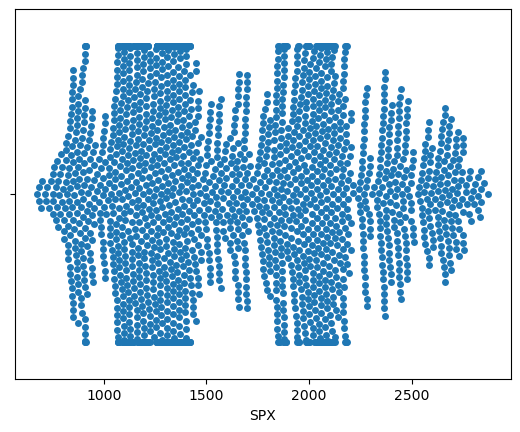

In [19]:
sns.swarmplot(x=df.SPX)

<Axes: xlabel='GLD', ylabel='Count'>

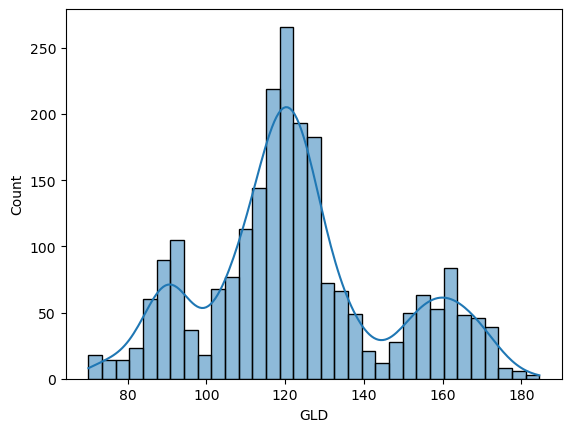

In [20]:
sns.histplot(x=df.GLD,kde=True)

<Axes: xlabel='GLD'>

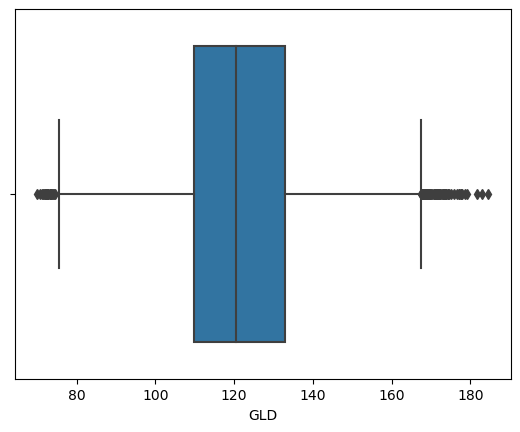

In [21]:
sns.boxplot(x=df.GLD)

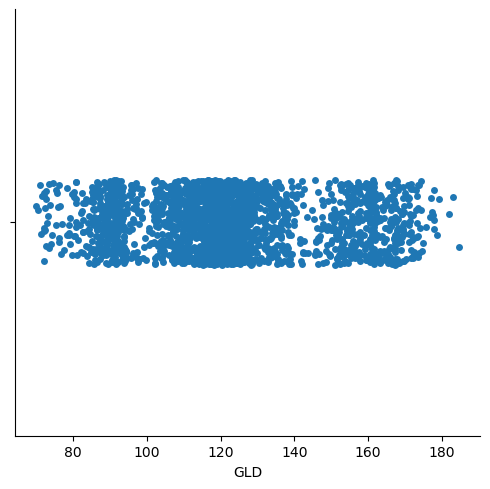

In [22]:
sns.catplot(x=df.GLD)

<Axes: xlabel='USO', ylabel='Count'>

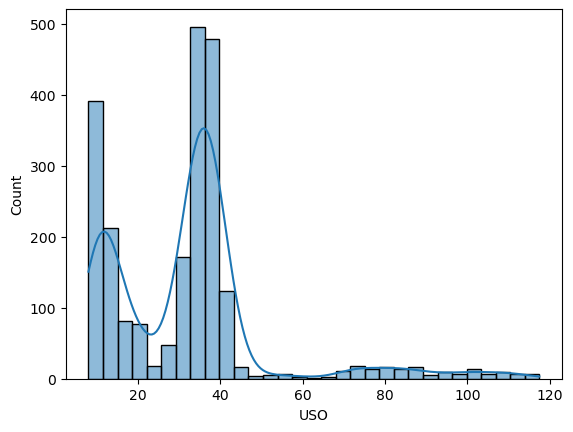

In [23]:
sns.histplot(x=df.USO,kde=True)

<Axes: xlabel='USO'>

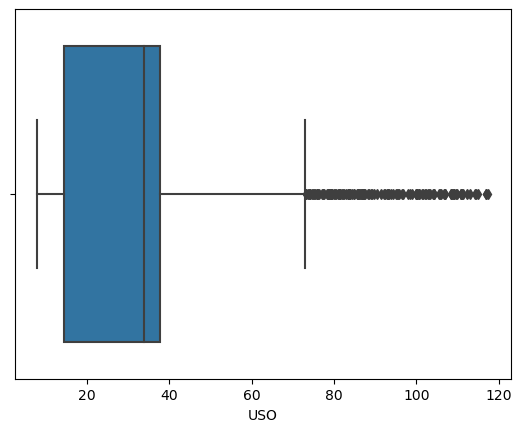

In [24]:
sns.boxplot(x=df.USO)

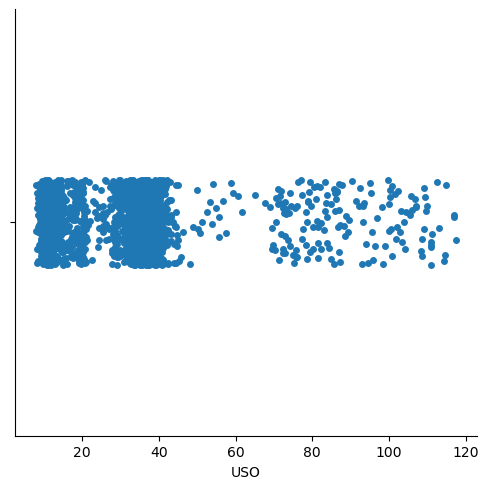

In [25]:
sns.catplot(x=df.USO)

<Axes: xlabel='SLV', ylabel='Count'>

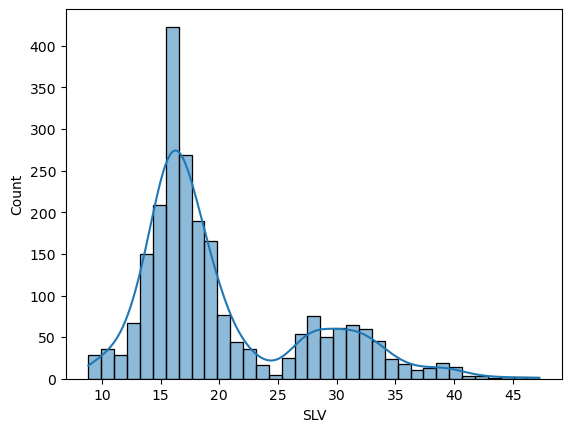

In [26]:
sns.histplot(x=df.SLV,kde=True)

<Axes: xlabel='SLV'>

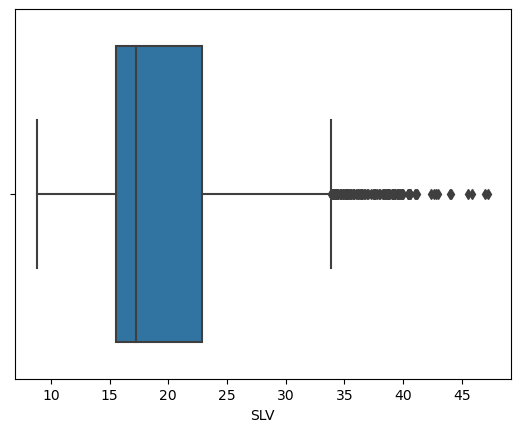

In [27]:
sns.boxplot(x=df.SLV)

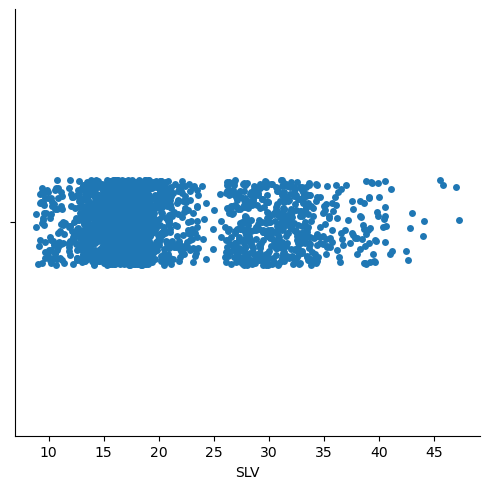

In [28]:
sns.catplot(x=df.SLV)

<Axes: xlabel='SLV'>

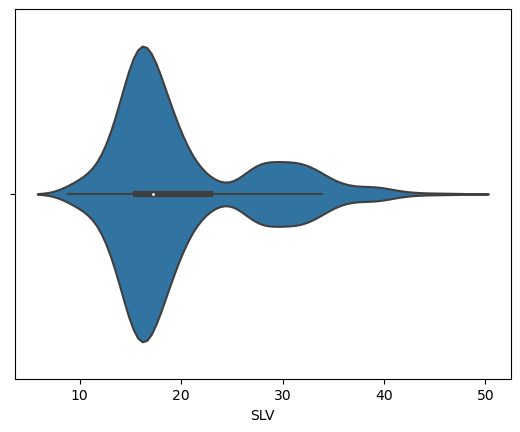

In [29]:
sns.violinplot(x=df.SLV)

## Bivariant Analysis 

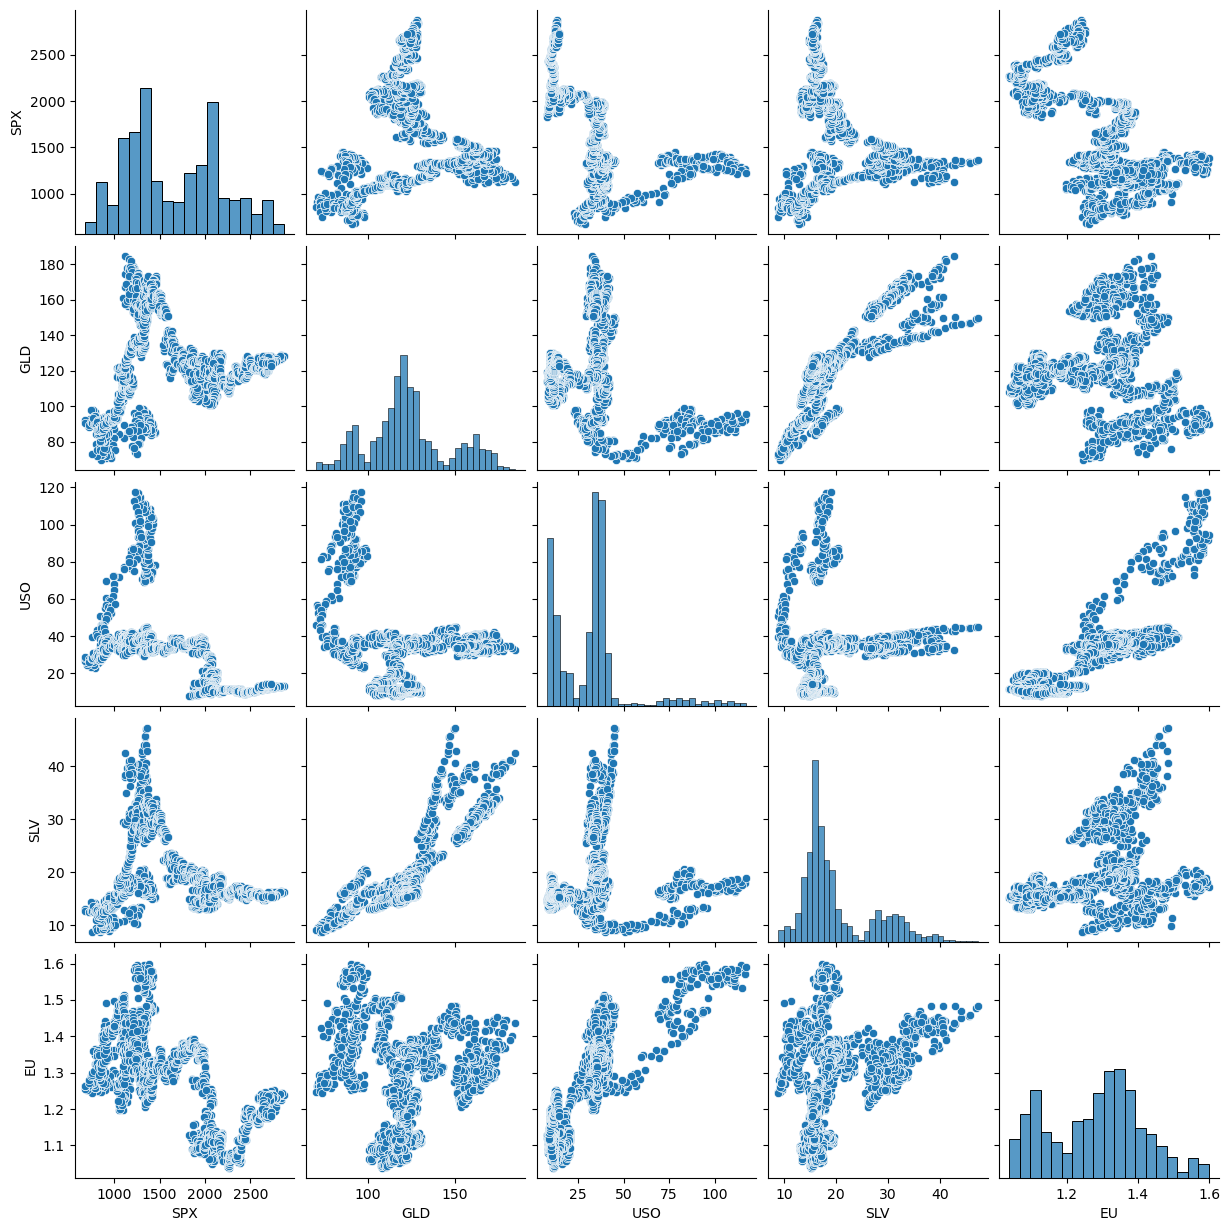

In [31]:
sns.pairplot(df)

# Checking Null Values


In [32]:
df.isnull().sum()

Date    0
SPX     0
GLD     0
USO     0
SLV     0
EU      0
dtype: int64

# Removing date column

In [33]:
## Removing constant features
df.drop(['Date'], axis="columns", inplace=True)

In [34]:
df

,SPX,GLD,USO,SLV,EU
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


# Feature selection

<Axes: >

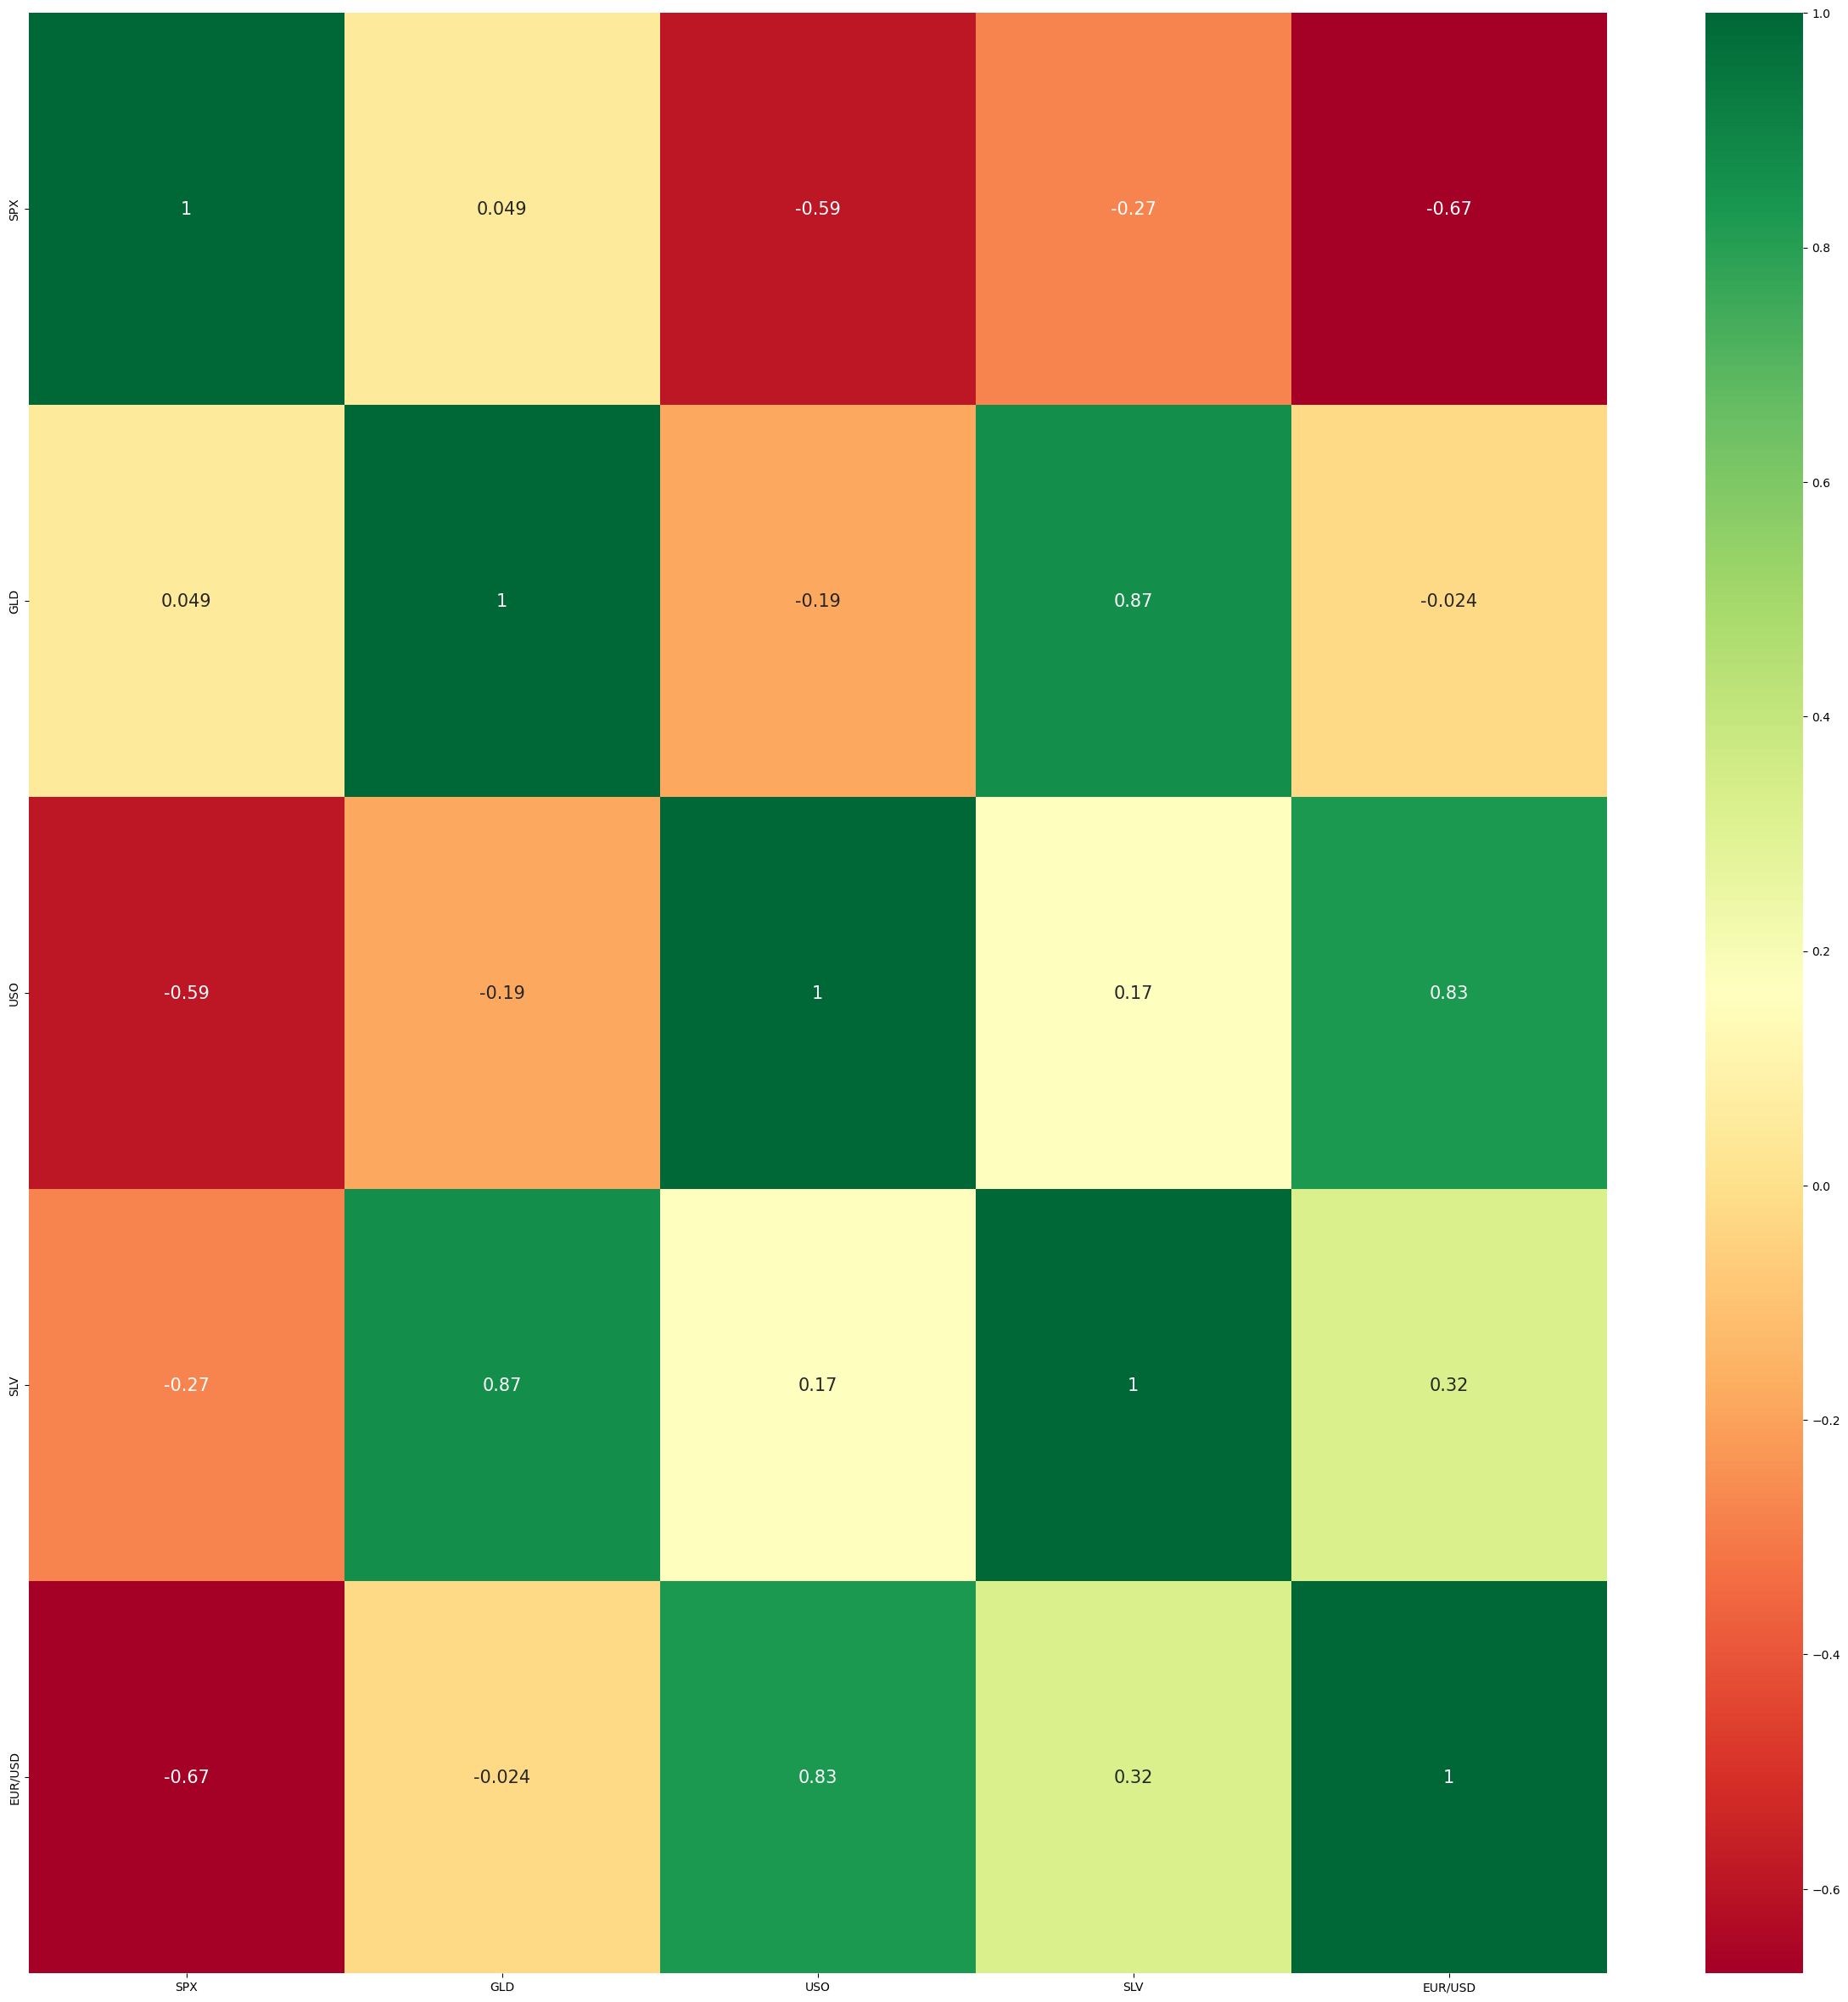

In [35]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(num_data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

# Model creation

In [36]:
## Split data into x and y
x = df.drop('EU', axis=1)
y = df.EU

In [37]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [39]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 0.004349574257435369
R-squared (R2) score: 0.751702176929789


In [40]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)



Mean Squared Error: 0.00034057234476443757
R-squared (R2) score: 0.980558241612183


In [41]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


GB = GradientBoostingRegressor(n_estimators=700)
GB.fit(x_train, y_train)

y_pred = GB.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 0.0004716161591360568
R-squared (R2) score: 0.9730775338671277


In [42]:

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_regressor = SVR(kernel='linear')
svm_regressor.fit(x_train, y_train)

y_pred = svm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 0.053843487157650236
R-squared (R2) score: -2.0736848841928452


In [43]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 0.0007369276183995627
R-squared (R2) score: 0.9579320842502835
